# AAI-510 M1 Assignment: Exploratory Data Analysis for HC Lending

In machine learning, the algorithms are just the tools, the raw material is the data - it's the ore that makes the gold. Thus, to build useful models, one needs to get intimate with data — it's strengths, flaws, nuances, patterns, cycles, etc. Graphical data analysis is much more than mere visualization.

## Plotting Libraries in Python

Python has many graphical analysis libraries: Matplotlib, Plotly, Bokeh, ggplot2, Seaborn, Altair, etc. We will primarily use Seaborn and Matplotlib for this assignment.

>**Matplotlib** is a popular plotting package that is being continuously developed. It offers numerous rendering backends and uses a verbose syntax, giving plots a high degree of flexibility and customizability.

>**Pandas** the Python library that provides a concise way to manipulate data in tabular format also has built-in plotting methods that use Matplotlib underneath.

>**Seaborn** is a Python plotting library built on top of Matplotlib that integrates heavily with pandas. Unlike matplotlib, you can avoid specifying numerous styling parameters and still get graphs that look good out of the box. Consider seaborn if you want to quickly create plots, especially statistical plots with more attractive default styles.

## Seaborn vs. Matplotlib
[Seaborn](http://seaborn.pydata.org/) is a Python library for ploting and analyzing data. Starting with seaborn has advantages:
* It integrates closely with *pandas* data structures (`DataFrame`).
* You can focus on what your plots means rather than on the details of how to draw them.
* It provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

**The Basic Structure of a Seaborn Plot:**

`seaborn.plot_function(data, x-variable, y-variable, hue) #hue is the 'by' variable to subgroup data`

## 1. Setup: Importing Libraries and Loading Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the seaborn theme for aesthetically pleasing plots
sns.set_theme()

# Display plots inline in the notebook
%matplotlib inline

### Load the Dataset
**Note**: You need to download the `train_data.csv` file from the Home Credit Default Risk competition data and make it accessible to this notebook. For Colab, you can upload it to your session storage or mount your Google Drive.

In [4]:

try:
    df_train = pd.read_csv('train_data.csv')
except FileNotFoundError:
    print("Error: 'application_train.csv' not found. Please upload the file or check the path.")
    

# Display the first few rows and shape of the dataframe
print("Shape of the dataframe (rows, columns):", df_train.shape)
print("\nFirst 5 rows of the dataframe:")
df_train.head()

Shape of the dataframe (rows, columns): (153755, 122)

First 5 rows of the dataframe:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,Cash loans,F,N,Y,1,157500.0,900000.0,26446.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,381230,0,Cash loans,F,N,Y,1,90000.0,733176.0,21438.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
2,450177,0,Cash loans,F,Y,Y,0,189000.0,1795500.0,62541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,332445,0,Cash loans,M,Y,N,0,175500.0,494550.0,45490.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,357429,0,Cash loans,F,Y,Y,0,270000.0,1724688.0,54283.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Target Variable Analysis (`TARGET`)

The target variable indicates whether a client had payment difficulties (1) or not (0).

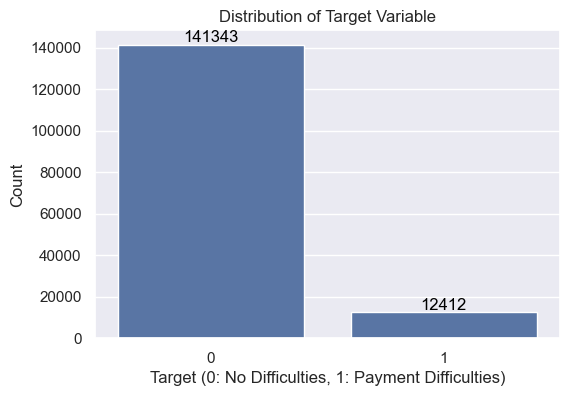

Absolute counts for each class in TARGET variable:
TARGET
0    141343
1     12412
Name: count, dtype: int64

Percentage of each class in TARGET variable:
TARGET
0    91.927417
1     8.072583
Name: proportion, dtype: float64


In [5]:
# Plot the distribution of the TARGET variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='TARGET')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: No Difficulties, 1: Payment Difficulties)')
plt.ylabel('Count')
# Adding text annotations for counts
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Calculate and print the percentage of each class
target_counts_abs = df_train['TARGET'].value_counts()
target_counts_perc = df_train['TARGET'].value_counts(normalize=True) * 100
print("Absolute counts for each class in TARGET variable:")
print(target_counts_abs)
print("\nPercentage of each class in TARGET variable:")
print(target_counts_perc)

## 3. Top-Ten Feature Analysis

Below, we analyze 10 features selected for their potential relevance in predicting loan default. For each feature, we provide a justification for its selection, a univariate plot, a bivariate plot against the `TARGET` variable, and a discussion of its observed relationship with the target.

### Feature 1: `AMT_INCOME_TOTAL` (Client's Income)

**Justification for selection:**
*(Income level is generally a strong indicator of an individual's financial capacity and ability to service debt. Clients with higher, more stable incomes might be less likely to default on loans. Conversely, very low incomes could signal higher risk. This variable is fundamental in most credit scoring models.)*

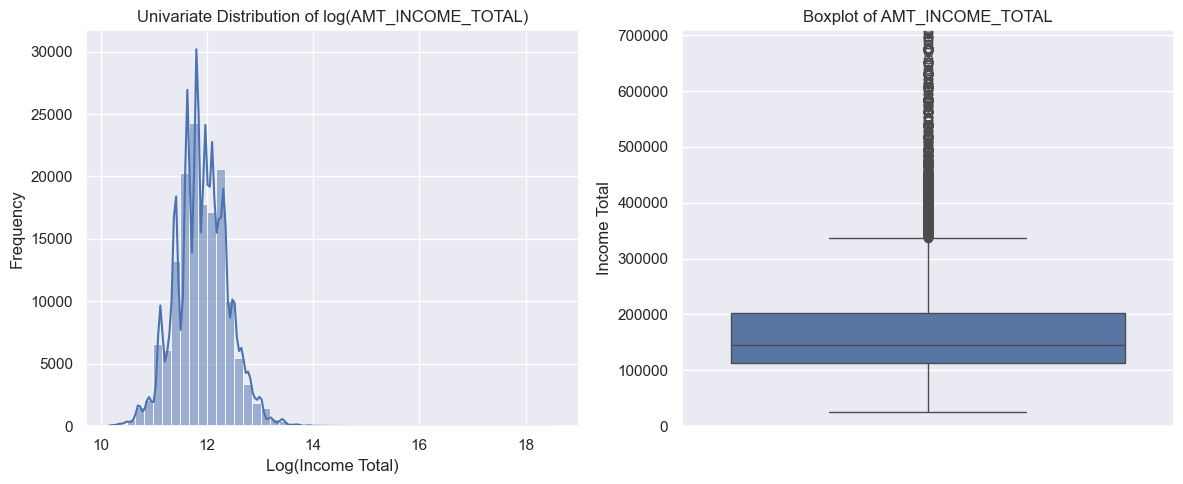

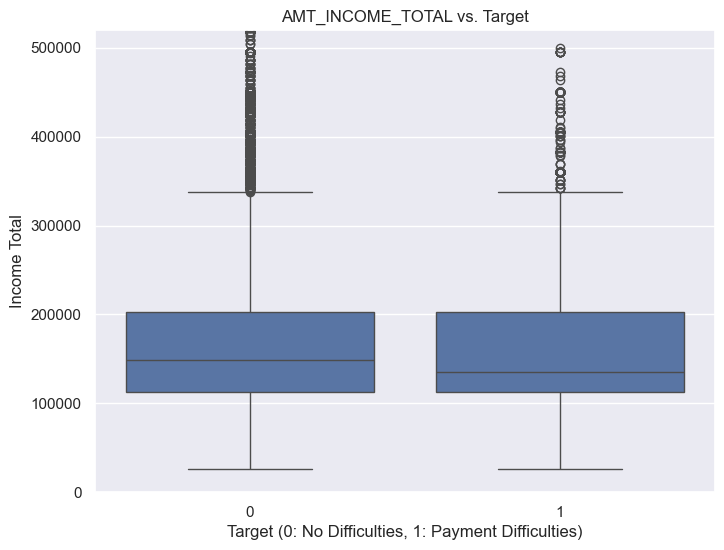

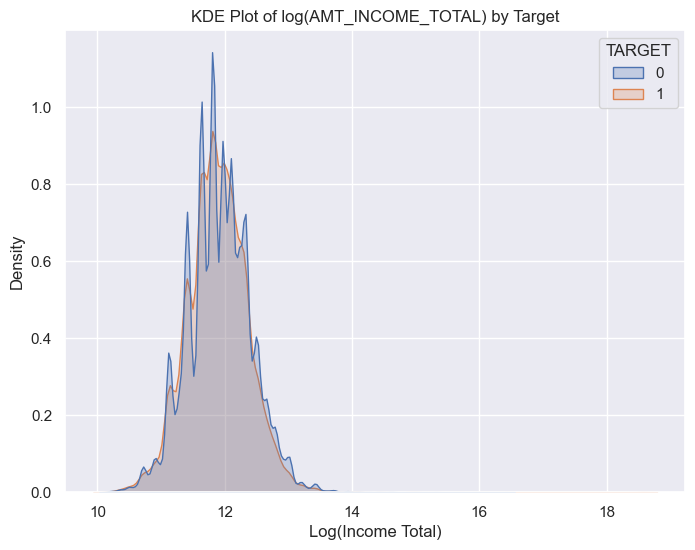

In [6]:
# Feature 1: AMT_INCOME_TOTAL
feature_name = 'AMT_INCOME_TOTAL'

# Univariate Plot (Histogram and KDE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Applying a log transform for better visualization of skewed data like income
sns.histplot(data=df_train, x=np.log1p(df_train[feature_name]), kde=True, bins=50)
plt.title(f'Univariate Distribution of log({feature_name})')
plt.xlabel(f'Log(Income Total)')
plt.ylabel('Frequency')

# Univariate Plot (Boxplot to see outliers more clearly)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, y=feature_name)
plt.title(f'Boxplot of {feature_name}')
plt.ylabel('Income Total')
# Limit y-axis for better visualization of the main distribution if there are extreme outliers
if df_train[feature_name].quantile(0.99) < df_train[feature_name].max():
     plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.5)
plt.tight_layout()
plt.show()

# Bivariate Plot (Boxplot of Income vs. Target)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='TARGET', y=feature_name)
# Limiting y-axis for better visualization due to outliers
if df_train[feature_name].quantile(0.99) < df_train[feature_name].max():
    plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.1) 
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Target (0: No Difficulties, 1: Payment Difficulties)')
plt.ylabel('Income Total')
plt.show()

# Bivariate Plot (KDE of Income vs. Target, using log transform for better viz)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_train, x=np.log1p(df_train[feature_name]), hue='TARGET', fill=True, common_norm=False)
plt.title(f'KDE Plot of log({feature_name}) by Target')
plt.xlabel('Log(Income Total)')
plt.ylabel('Density')
plt.show()

**Discussion of `AMT_INCOME_TOTAL` and its connection to `TARGET`:**
*(Observe the univariate plots:
- The histogram (especially with log transformation) shows the overall distribution of income. Is it right-skewed (common for income)?
- The boxplot highlights the median, quartiles, and potential outliers. Are there many extreme high-income outliers?
Observe the bivariate plots:
- How does the distribution of income (e.g., median, spread shown by boxplots) differ for clients who defaulted (TARGET=1) versus those who didn't (TARGET=0)?
- Does the KDE plot show a clear separation or overlap in income distributions for the two target groups? For instance, do defaulters tend to have lower incomes?)*

### Feature 2: `AMT_CREDIT` (Credit Amount of the Loan)

**Justification for selection:**
*(The total amount of credit requested by the client is a direct measure of their borrowing need and potential debt burden. Very large loan amounts, especially relative to income or goods price, might indicate higher risk of default.)*

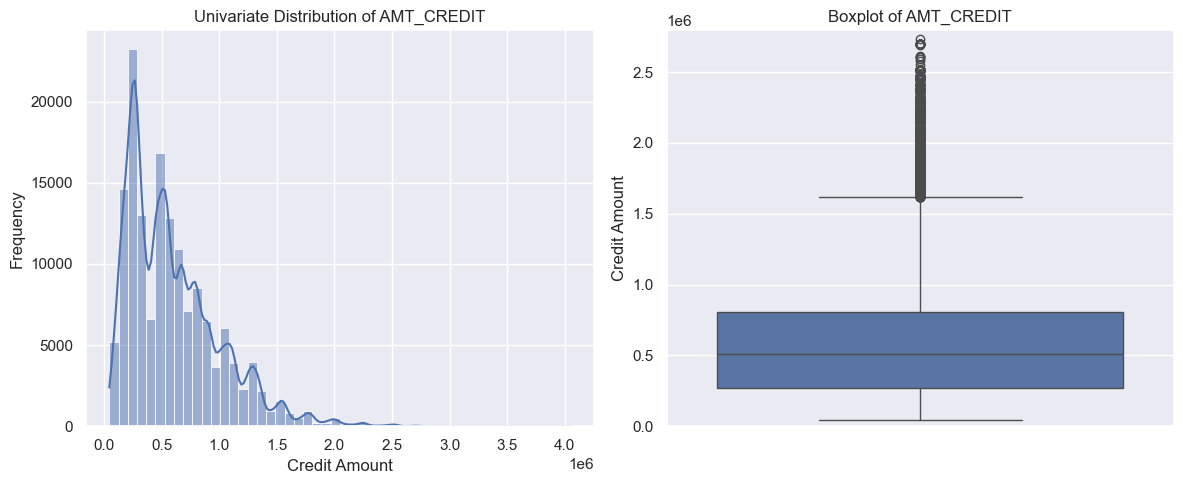

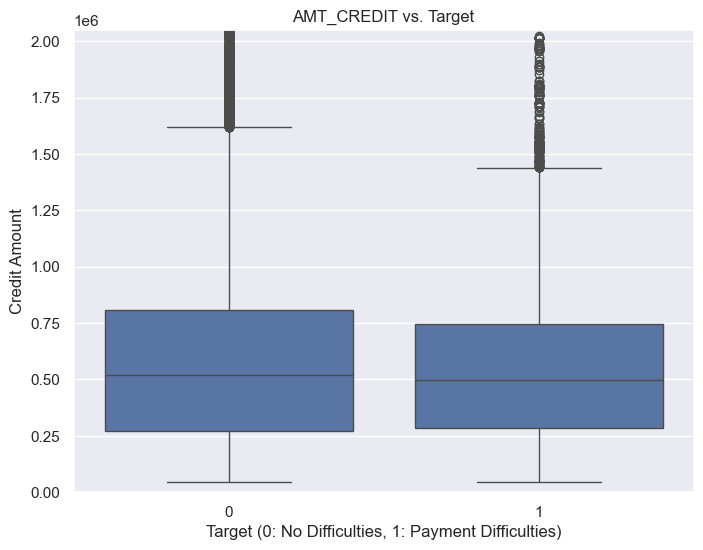

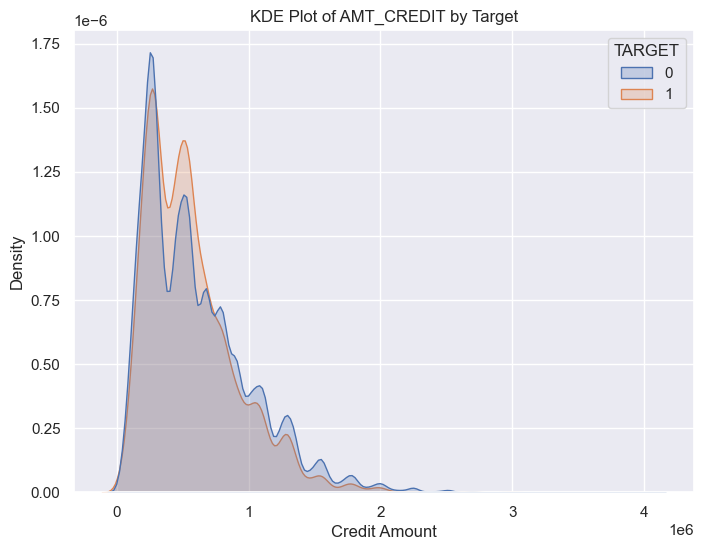

In [7]:
# Feature 2: AMT_CREDIT
feature_name = 'AMT_CREDIT'

# Univariate Plot (Histogram and KDE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x=feature_name, kde=True, bins=50)
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')

# Univariate Plot (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, y=feature_name)
plt.title(f'Boxplot of {feature_name}')
plt.ylabel('Credit Amount')
if df_train[feature_name].quantile(0.99) < df_train[feature_name].max():
     plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.5)
plt.tight_layout()
plt.show()

# Bivariate Plot (Boxplot of Credit Amount vs. Target)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='TARGET', y=feature_name)
if df_train[feature_name].quantile(0.99) < df_train[feature_name].max():
    plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.1)
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Target (0: No Difficulties, 1: Payment Difficulties)')
plt.ylabel('Credit Amount')
plt.show()

# Bivariate Plot (KDE of Credit Amount vs. Target)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_train, x=feature_name, hue='TARGET', fill=True, common_norm=False)
plt.title(f'KDE Plot of {feature_name} by Target')
plt.xlabel('Credit Amount')
plt.ylabel('Density')
plt.show()

**Discussion of `AMT_CREDIT` and its connection to `TARGET`:**
*(Observe the univariate plots:
- What is the typical range of loan amounts? Is the distribution skewed?
- Are there extreme outliers in loan amounts?
Observe the bivariate plots:
- Do clients who default (TARGET=1) tend to take out larger or smaller loans compared to non-defaulters (TARGET=0)?
- Examine the median and spread in the boxplots for both target groups. Does the KDE plot show any clear differences in the distribution of loan amounts for defaulters versus non-defaulters?)*

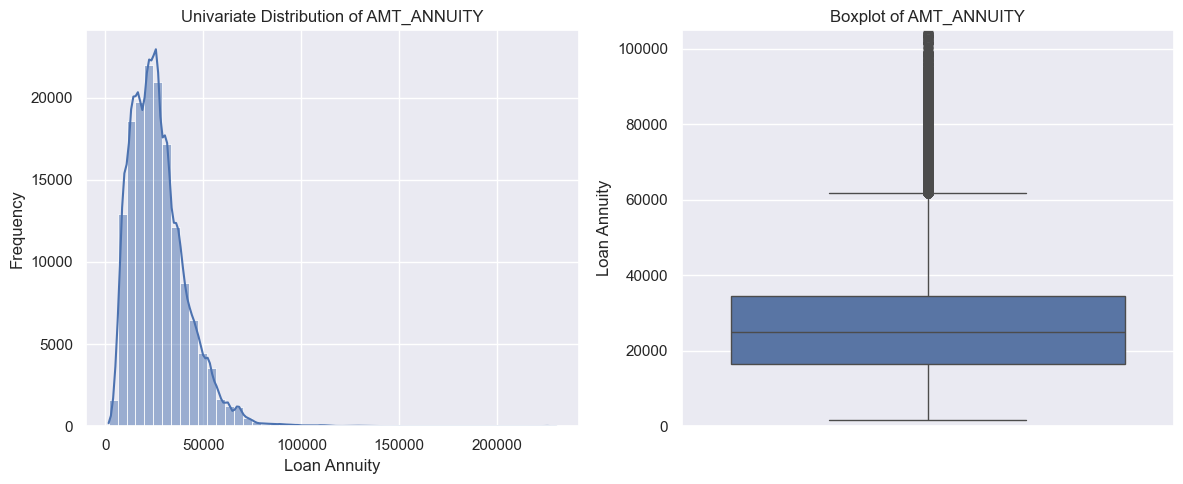

Number of missing values in AMT_ANNUITY: 5 (out of 153755)


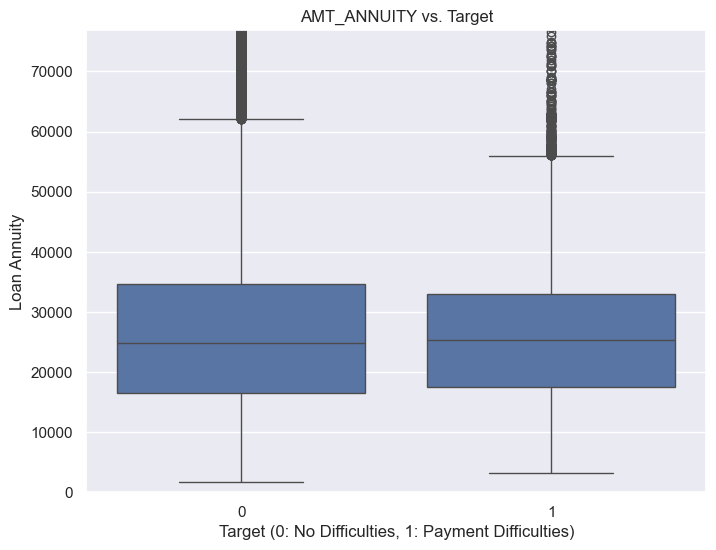

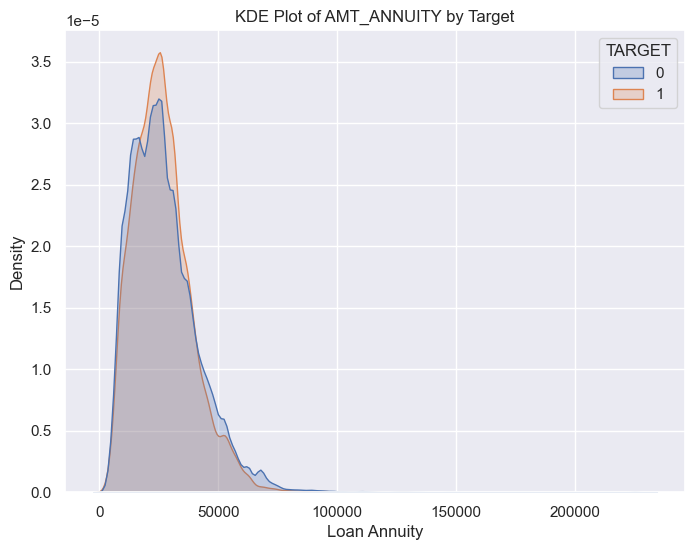

In [8]:
# Feature 3: AMT_ANNUITY
feature_name = 'AMT_ANNUITY'

# Univariate Plot (Histogram and KDE) - handle NaNs for plotting by dropping them for this viz
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train.dropna(subset=[feature_name]), x=feature_name, kde=True, bins=50)
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Loan Annuity')
plt.ylabel('Frequency')

# Univariate Plot (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, y=feature_name)
plt.title(f'Boxplot of {feature_name}')
plt.ylabel('Loan Annuity')
if df_train[feature_name].notna().any() and df_train[feature_name].quantile(0.99) < df_train[feature_name].max(skipna=True):
     plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.5)
plt.tight_layout()
plt.show()

print(f"Number of missing values in {feature_name}: {df_train[feature_name].isnull().sum()} (out of {len(df_train)})")

# Bivariate Plot (Boxplot of Annuity vs. Target)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='TARGET', y=feature_name)
if df_train[feature_name].notna().any() and df_train[feature_name].quantile(0.99) < df_train[feature_name].max(skipna=True):
    plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.1)
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Target (0: No Difficulties, 1: Payment Difficulties)')
plt.ylabel('Loan Annuity')
plt.show()

# Bivariate Plot (KDE of Annuity vs. Target)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_train.dropna(subset=[feature_name]), x=feature_name, hue='TARGET', fill=True, common_norm=False)
plt.title(f'KDE Plot of {feature_name} by Target')
plt.xlabel('Loan Annuity')
plt.ylabel('Density')
plt.show()

**Discussion of `AMT_ANNUITY` and its connection to `TARGET`:**
*(Observe the univariate plots:
- Describe the distribution of loan annuities. Is it skewed?
- The boxplot reveals outliers. Are there loans with exceptionally high annuities?
- Note the number of missing values. How might these be handled in preprocessing?
Observe the bivariate plots:
- Is there a discernible difference in the median or distribution of loan annuities between defaulters and non-defaulters?
- Does the KDE plot suggest that defaulters might have slightly different annuity patterns (e.g., perhaps lower annuities on average, or a wider spread)?)*

### Feature 4: `AMT_GOODS_PRICE` (Price of Goods for Loan)

**Justification for selection:**
*(For consumer loans, the price of the goods being financed is often closely related to the loan amount. A significant discrepancy between goods price and loan amount, or very high goods prices, might correlate with repayment behavior. It also provides context to the loan purpose.)*

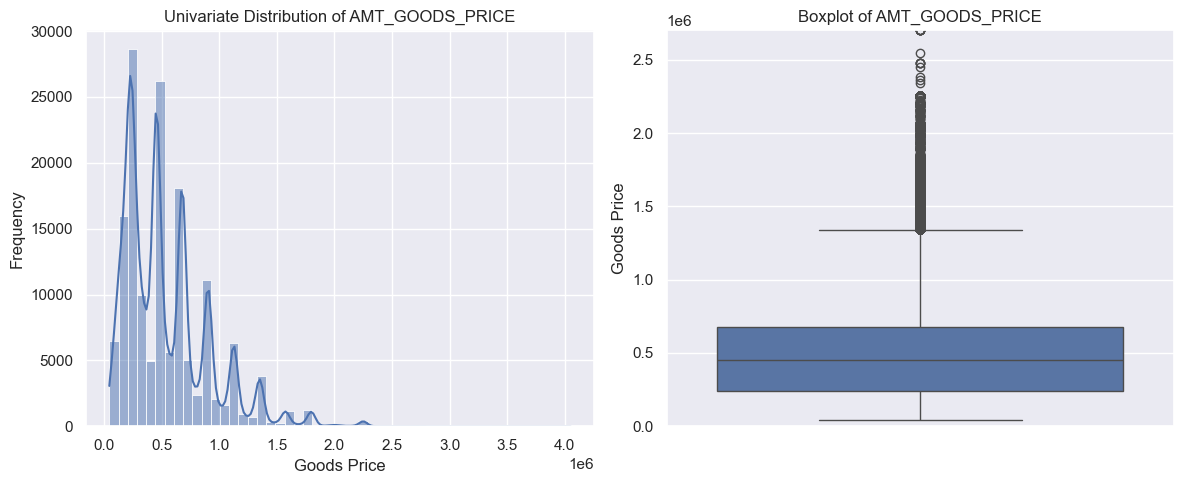

Number of missing values in AMT_GOODS_PRICE: 149 (out of 153755)


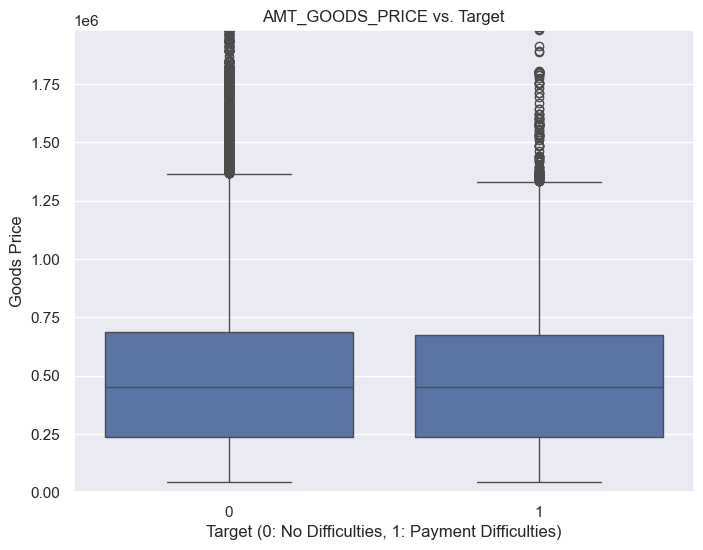

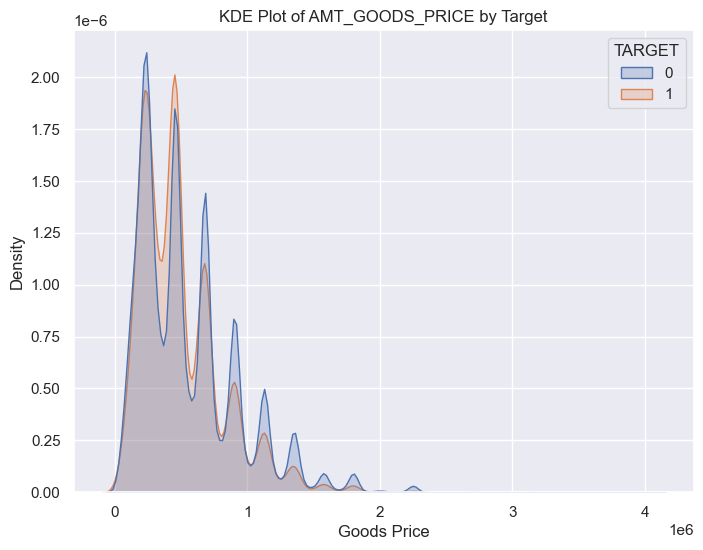

In [9]:
# Feature 4: AMT_GOODS_PRICE
feature_name = 'AMT_GOODS_PRICE'

# Univariate Plot (Histogram and KDE) - handle NaNs for plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train.dropna(subset=[feature_name]), x=feature_name, kde=True, bins=50)
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Goods Price')
plt.ylabel('Frequency')

# Univariate Plot (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, y=feature_name)
plt.title(f'Boxplot of {feature_name}')
plt.ylabel('Goods Price')
if df_train[feature_name].notna().any() and df_train[feature_name].quantile(0.99) < df_train[feature_name].max(skipna=True):
     plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.5)
plt.tight_layout()
plt.show()

print(f"Number of missing values in {feature_name}: {df_train[feature_name].isnull().sum()} (out of {len(df_train)})")

# Bivariate Plot (Boxplot of Goods Price vs. Target)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='TARGET', y=feature_name)
if df_train[feature_name].notna().any() and df_train[feature_name].quantile(0.99) < df_train[feature_name].max(skipna=True):
    plt.ylim(0, df_train[feature_name].quantile(0.99) * 1.1)
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Target (0: No Difficulties, 1: Payment Difficulties)')
plt.ylabel('Goods Price')
plt.show()

# Bivariate Plot (KDE of Goods Price vs. Target)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_train.dropna(subset=[feature_name]), x=feature_name, hue='TARGET', fill=True, common_norm=False)
plt.title(f'KDE Plot of {feature_name} by Target')
plt.xlabel('Goods Price')
plt.ylabel('Density')
plt.show()

### Feature 5: `DAYS_BIRTH` (Client's Age)

**Justification for selection:**
*(Age is a significant demographic factor. Younger applicants might have less stable financial histories or income, while older applicants might be closer to retirement or have different financial priorities. Both ends of the age spectrum could present different risk profiles.)* 

Note: `DAYS_BIRTH` is typically represented as negative days from the application date. We'll convert it to positive years (Age).

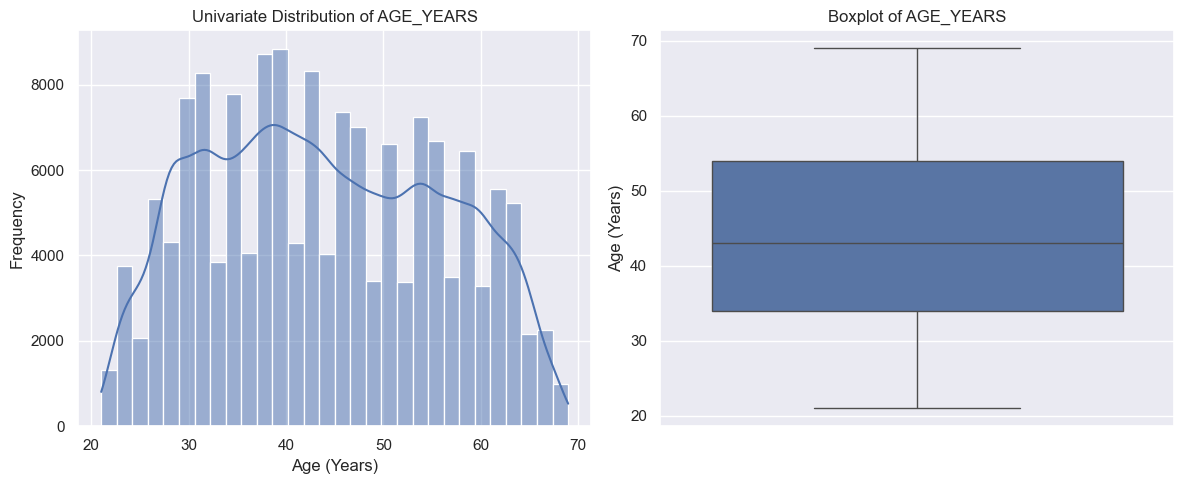

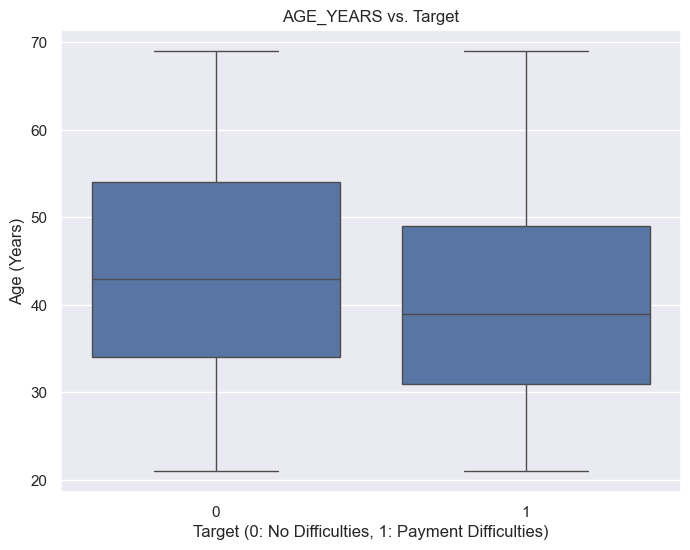

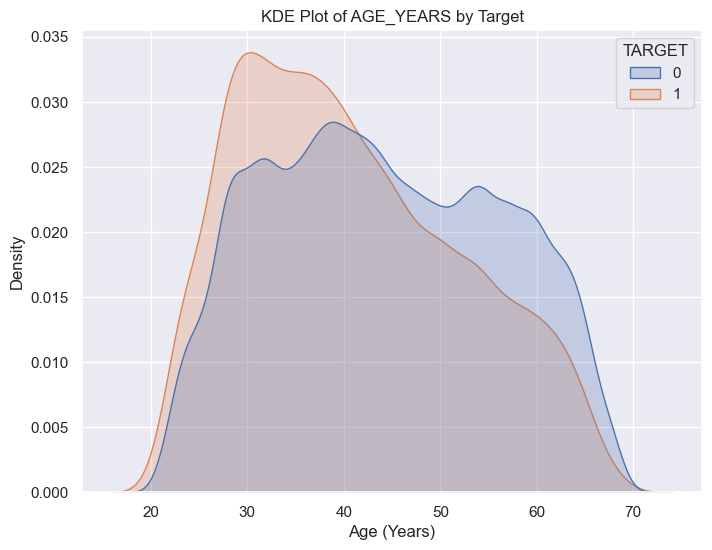

In [10]:
# Feature 5: DAYS_BIRTH (transformed to Age in Years)
df_train['AGE_YEARS'] = (df_train['DAYS_BIRTH'] / -365).round().astype(int)
feature_name_transformed = 'AGE_YEARS'

# Univariate Plot (Histogram and KDE for Age)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x=feature_name_transformed, kde=True, bins=30)
plt.title(f'Univariate Distribution of {feature_name_transformed}')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

# Univariate Plot (Boxplot for Age)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, y=feature_name_transformed)
plt.title(f'Boxplot of {feature_name_transformed}')
plt.ylabel('Age (Years)')
plt.tight_layout()
plt.show()

# Bivariate Plot (Boxplot of Age vs. Target)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='TARGET', y=feature_name_transformed)
plt.title(f'{feature_name_transformed} vs. Target')
plt.xlabel('Target (0: No Difficulties, 1: Payment Difficulties)')
plt.ylabel('Age (Years)')
plt.show()

# Bivariate Plot (KDE of Age vs. Target)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_train, x=feature_name_transformed, hue='TARGET', fill=True, common_norm=False)
plt.title(f'KDE Plot of {feature_name_transformed} by Target')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

**Discussion of `AGE_YEARS` (from `DAYS_BIRTH`) and its connection to `TARGET`:**
*(Observe the univariate plots:
- What is the age distribution of the applicants? Is it unimodal, bimodal, skewed?
- What is the typical age range?
Observe the bivariate plots:
- Does age seem to influence the likelihood of default? For instance, are younger or older clients more likely to default based on the boxplot (compare medians and interquartile ranges)?
- Does the KDE plot show different age distributions for defaulters versus non-defaulters? (e.g., one group might be younger on average).)*

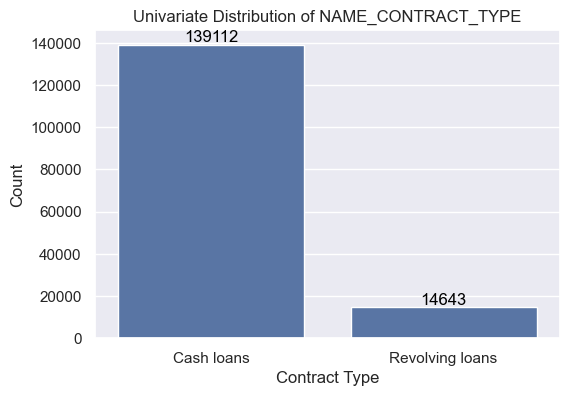

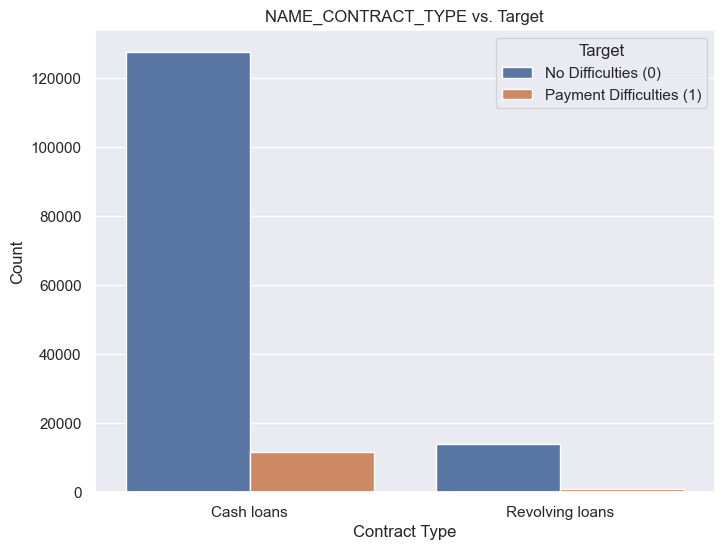

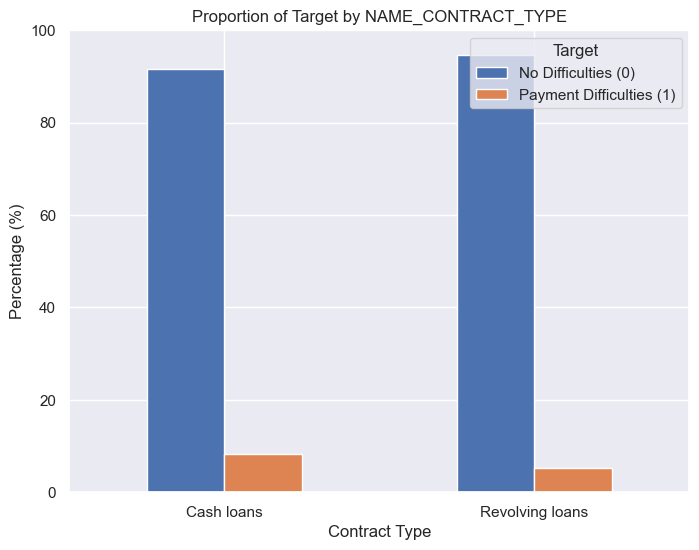

In [11]:
# Feature 6: NAME_CONTRACT_TYPE
feature_name = 'NAME_CONTRACT_TYPE'

# Univariate Plot (Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x=feature_name)
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotation might not be needed if only two categories
# Adding text annotations for counts
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Bivariate Plot (Countplot of Contract Type vs. Target)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x=feature_name, hue='TARGET')
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.show()

# Bivariate Plot (Proportion of Target for each Contract Type)
contract_target_prop = pd.crosstab(df_train[feature_name], df_train['TARGET'], normalize='index') * 100
contract_target_prop.plot(kind='bar', stacked=False, figsize=(8,6)) # Use stacked=False for direct comparison
plt.title(f'Proportion of Target by {feature_name}')
plt.xlabel('Contract Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.ylim(0, 100) # Ensure y-axis goes to 100%
plt.show()

**Discussion of `NAME_CONTRACT_TYPE` and its connection to `TARGET`:**
*(Observe the univariate plot:
- What are the different contract types (likely 'Cash loans' and 'Revolving loans') and their frequencies? Which type is more common?
Observe the bivariate plots:
- Does one type of contract have a noticeably higher or lower proportion of defaults (TARGET=1)?
- The proportional bar chart should make this comparison clear. Comment on any observed differences in default rates between contract types.)*

### Feature 7: `CODE_GENDER` (Client's Gender)

**Justification for selection:**
*(Demographic information like gender can sometimes reveal patterns in financial behavior or risk, although it's crucial to consider fairness and avoid biased conclusions. The dataset might show different default rates across genders.)*

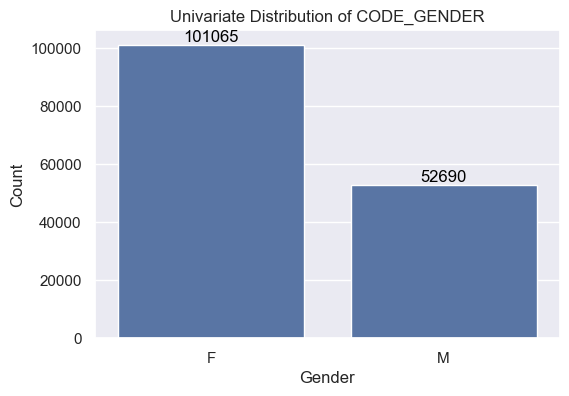

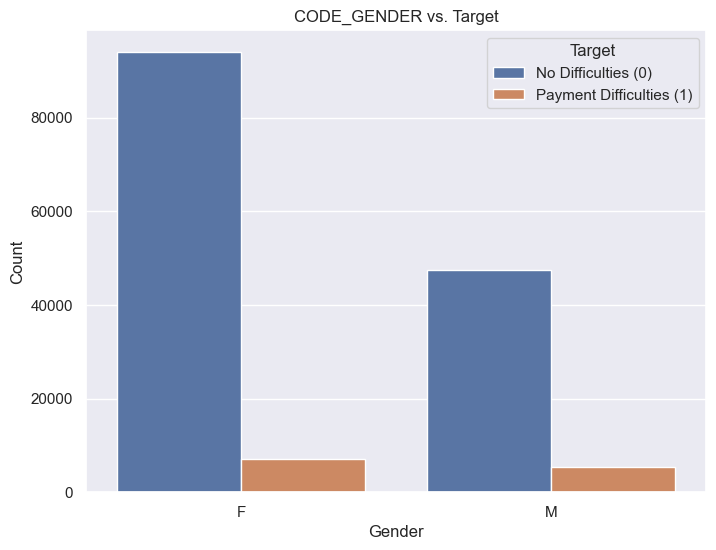

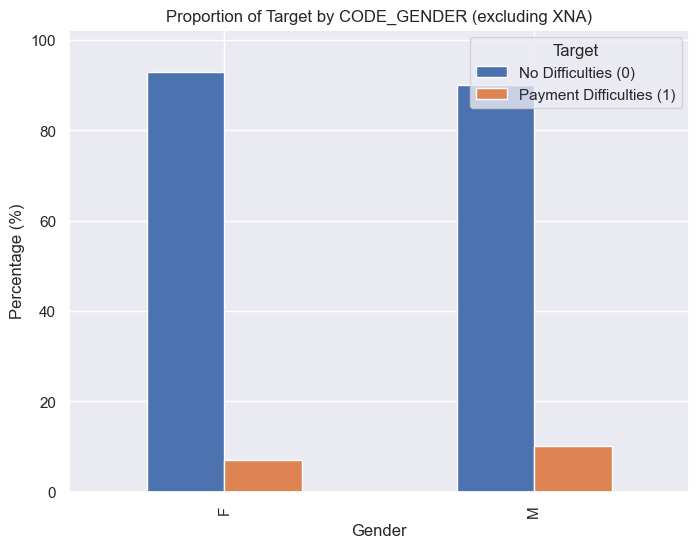

In [13]:
# Feature 7: CODE_GENDER
feature_name = 'CODE_GENDER'

# Univariate Plot (Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x=feature_name)
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Gender')
plt.ylabel('Count')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Bivariate Plot (Countplot of Gender vs. Target)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x=feature_name, hue='TARGET')
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.show()

# Bivariate Plot (Proportion of Target for each Gender)
# Filtering out 'XNA' if it exists and has few samples, as it might skew proportions or be uninformative
df_gender_filtered = df_train[df_train[feature_name] != 'XNA']
if not df_gender_filtered.empty:
    gender_target_prop = pd.crosstab(df_gender_filtered[feature_name], df_gender_filtered['TARGET'], normalize='index') * 100
    gender_target_prop.plot(kind='bar', stacked=False, figsize=(8,6))
    plt.title(f'Proportion of Target by {feature_name} (excluding XNA)')
    plt.xlabel('Gender')
    plt.ylabel('Percentage (%)')
    plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
    plt.ylim(0,max(20, gender_target_prop.max().max() * 1.1)) # Adjust ylim for better viz of default rate
    plt.show()
else:
    print(f"No data to plot for {feature_name} after filtering 'XNA', or only 'XNA' present.")

### Feature 8: `FLAG_OWN_CAR` (Client Owns a Car)

**Justification for selection:**
*(Car ownership can be a proxy for financial status or lifestyle. While it might indicate some level of wealth, it also entails expenses (maintenance, fuel, insurance). It's worth investigating if car ownership correlates with default risk.)*

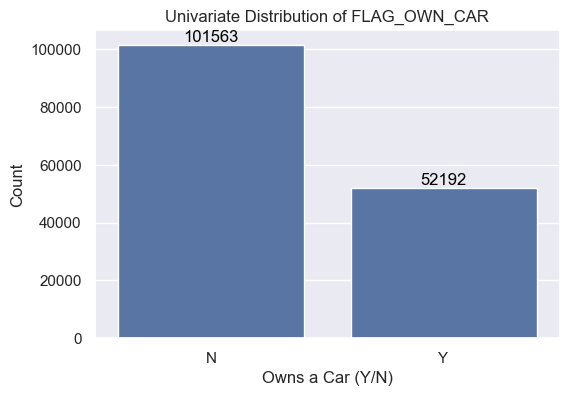

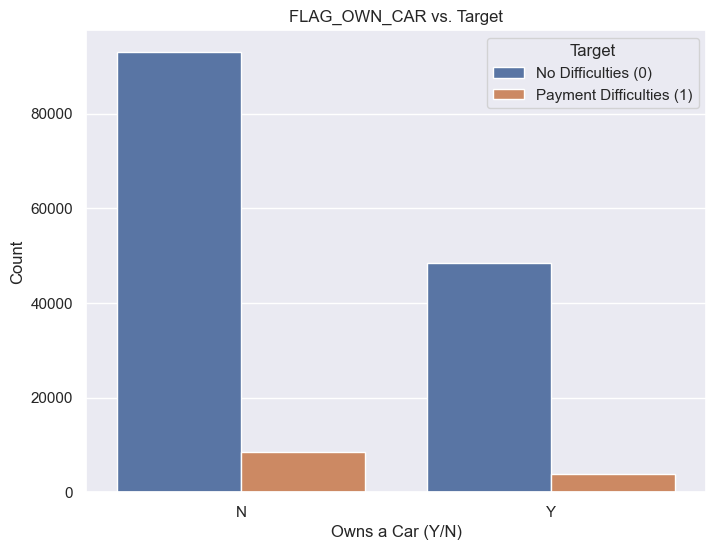

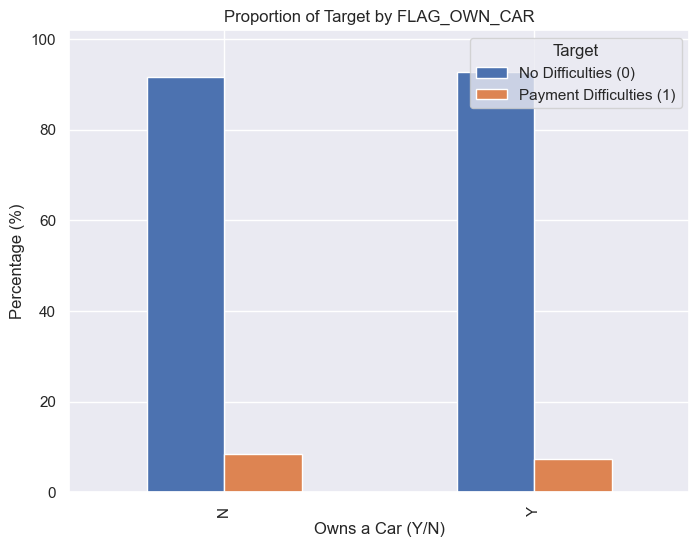

In [15]:
# Feature 8: FLAG_OWN_CAR
feature_name = 'FLAG_OWN_CAR'

# Univariate Plot (Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x=feature_name)
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Owns a Car (Y/N)')
plt.ylabel('Count')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Bivariate Plot (Countplot of Car Ownership vs. Target)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x=feature_name, hue='TARGET')
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Owns a Car (Y/N)')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.show()

# Bivariate Plot (Proportion of Target for Car Ownership)
car_target_prop = pd.crosstab(df_train[feature_name], df_train['TARGET'], normalize='index') * 100
car_target_prop.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title(f'Proportion of Target by {feature_name}')
plt.xlabel('Owns a Car (Y/N)')
plt.ylabel('Percentage (%)')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.ylim(0,max(20, car_target_prop.max().max() * 1.1)) # Adjust ylim for better viz of default rate
plt.show()

### Feature 9: `NAME_INCOME_TYPE` (Client's Income Type)

**Justification for selection:**
*(The source of income (e.g., 'Working', 'Pensioner', 'State servant', 'Commercial associate', 'Businessman') is a critical factor for assessing income stability and, consequently, repayment capacity. Different income types may have varying levels of risk.)*

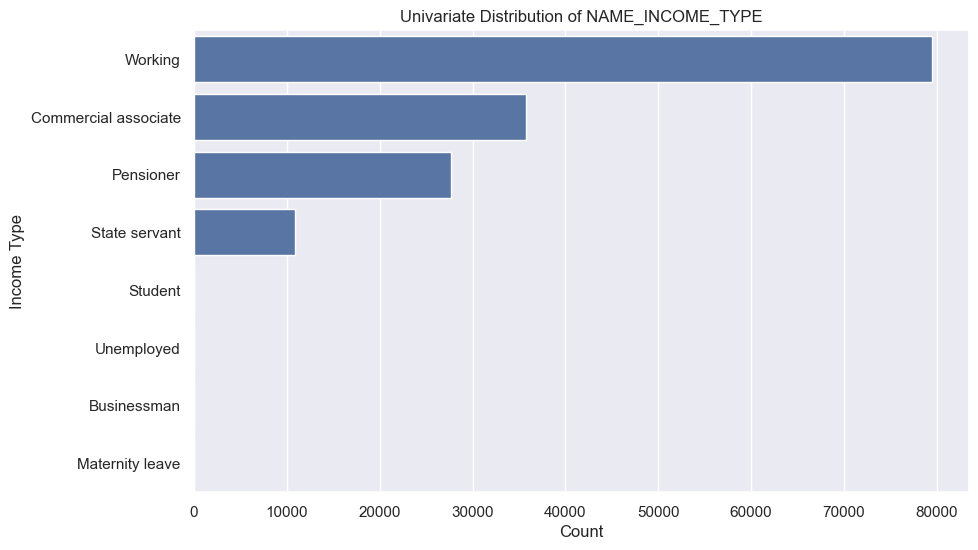

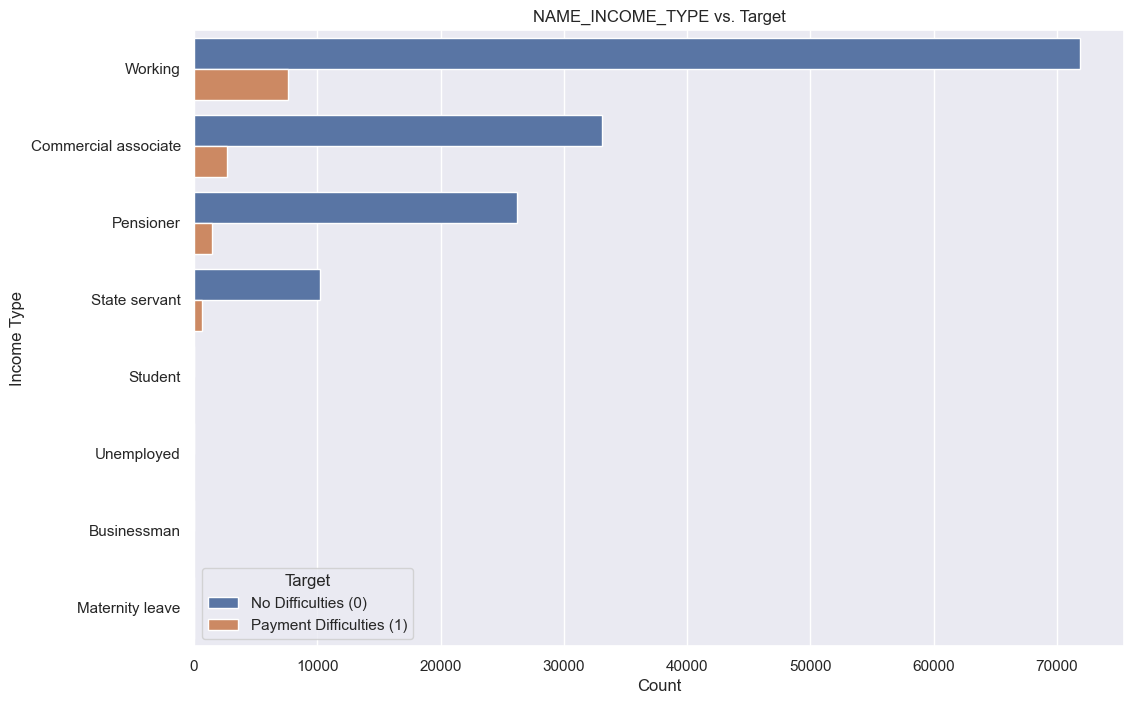

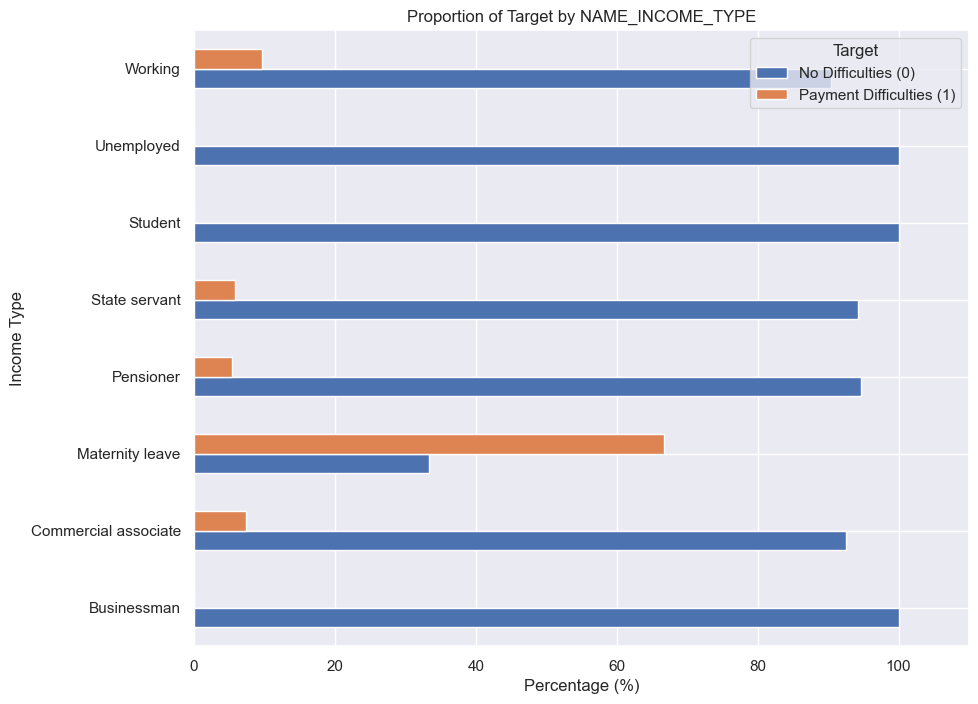

In [16]:
# Feature 9: NAME_INCOME_TYPE
feature_name = 'NAME_INCOME_TYPE'

# Univariate Plot (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, y=feature_name, order = df_train[feature_name].value_counts().index) # Use y for better readability
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.show()

# Bivariate Plot (Countplot of Income Type vs. Target)
plt.figure(figsize=(12, 8))
sns.countplot(data=df_train, y=feature_name, hue='TARGET', order = df_train[feature_name].value_counts().index)
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.show()

# Bivariate Plot (Proportion of Target for each Income Type)
income_type_target_prop = pd.crosstab(df_train[feature_name], df_train['TARGET'], normalize='index') * 100
income_type_target_prop.plot(kind='barh', stacked=False, figsize=(10,8)) # Use barh for better readability
plt.title(f'Proportion of Target by {feature_name}')
plt.xlabel('Percentage (%)')
plt.ylabel('Income Type')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.xlim(0,max(25, income_type_target_prop.max().max() * 1.1)) # Adjust xlim for better viz of default rate
plt.show()

**Discussion of `NAME_INCOME_TYPE` and its connection to `TARGET`:**
*(Observe the univariate plot:
- Which income types are most common among applicants? Are there any rare income types?
Observe the bivariate plots:
- Are there specific income types that show a noticeably higher or lower proportion of defaults (TARGET=1)?
- For example, how do 'Pensioner' or 'Unemployed' (if present) compare to 'Working' or 'Commercial associate' in terms of default rates?)*

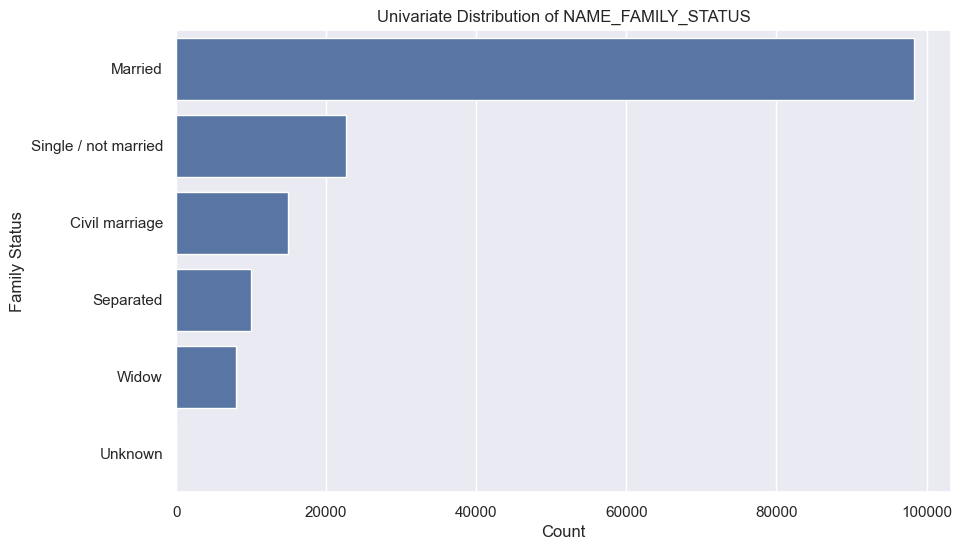

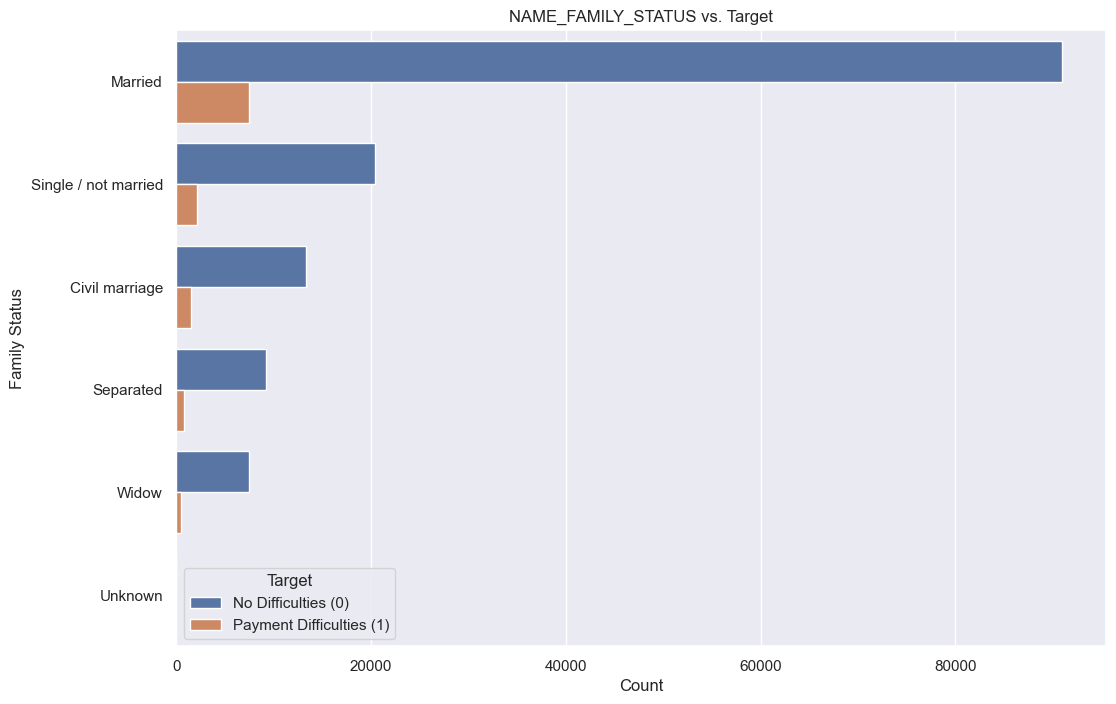

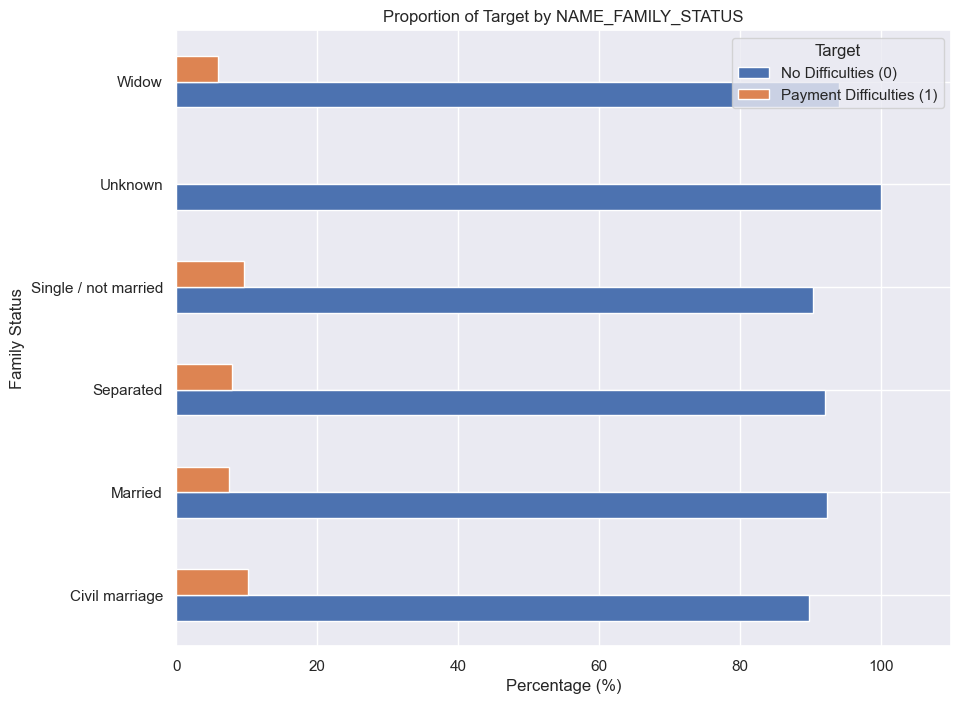

In [17]:
# Feature 10: NAME_FAMILY_STATUS
feature_name = 'NAME_FAMILY_STATUS'

# Univariate Plot (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, y=feature_name, order = df_train[feature_name].value_counts().index) # Use y for better readability
plt.title(f'Univariate Distribution of {feature_name}')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.show()

# Bivariate Plot (Countplot of Family Status vs. Target)
plt.figure(figsize=(12, 8))
sns.countplot(data=df_train, y=feature_name, hue='TARGET', order = df_train[feature_name].value_counts().index)
plt.title(f'{feature_name} vs. Target')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.show()

# Bivariate Plot (Proportion of Target for each Family Status)
family_status_target_prop = pd.crosstab(df_train[feature_name], df_train['TARGET'], normalize='index') * 100
family_status_target_prop.plot(kind='barh', stacked=False, figsize=(10,8))
plt.title(f'Proportion of Target by {feature_name}')
plt.xlabel('Percentage (%)')
plt.ylabel('Family Status')
plt.legend(title='Target', labels=['No Difficulties (0)', 'Payment Difficulties (1)'])
plt.xlim(0,max(20, family_status_target_prop.max().max() * 1.1)) # Adjust xlim for better viz of default rate
plt.show()